In [1]:
#!pip install dask

In [2]:
from exportFuncs import costly_simulation

In [3]:
BASE_PATH="out/"

In [4]:
ROOT_FOLDER="niceRootFolder/"

In [5]:
OUTPUT_DIR=BASE_PATH + ROOT_FOLDER
OUTPUT_DIR

'out/niceRootFolder/'

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# import os
# from pathlib import Path
#
# Path(BASE_PATH + "").mkdir(exist_ok=True)
# Path(OUTPUT_DIR + "").mkdir(exist_ok=True)
# Path(OUTPUT_DIR + "gasf_map").mkdir(exist_ok=True)
# Path(OUTPUT_DIR + "gadf_map").mkdir(exist_ok=True)
# Path(OUTPUT_DIR + "gadf_wav").mkdir(exist_ok=True)
# Path(OUTPUT_DIR + "gasf_wav").mkdir(exist_ok=True)
# Path(OUTPUT_DIR + "gasf").mkdir(exist_ok=True)
# Path(OUTPUT_DIR + "gadf").mkdir(exist_ok=True)

In [8]:
NEW_SAMPLE_RATE=200

In [9]:
#!git clone https://github.com/soerenab/AudioMNIST

In [10]:
import numpy as np
import pandas as pd
import json
f = open('AudioMNIST/data/audioMNIST_meta.txt')
data = json.load(f)

print(data)
f.close()

{'01': {'accent': 'german', 'age': 30, 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Wuerzburg', 'recordingdate': '17-06-22-11-04-28', 'recordingroom': 'Kino'}, '02': {'accent': 'German', 'age': '25', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Hamburg', 'recordingdate': '17-06-26-17-57-29', 'recordingroom': 'Kino'}, '03': {'accent': 'German', 'age': '31', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Bremen', 'recordingdate': '17-06-30-17-34-51', 'recordingroom': 'Kino'}, '04': {'accent': 'German', 'age': '23', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Helmstedt', 'recordingdate': '17-06-30-18-09-14', 'recordingroom': 'Kino'}, '05': {'accent': 'German', 'age': '25', 'gender': 'male', 'native speaker': 'no', 'origin': 'Europe, Germany, Hameln', 'recordingdate': '17-07-06-10-53-10', 'recordingroom': 'Kino'}, '06': {'accent': 'German', 'age': '25', 'gender': 'male', 'native speaker': 'no

In [11]:
df_info = pd.DataFrame(data)
df_info

,01,02,03,04,05,06,07,08,09,10,...,51,52,53,54,55,56,57,58,59,60
accent,german,German,German,German,German,German,German/Spanish,German,South Korean,German,...,German,French,German,German,German,German,German,German,German,Tamil
age,30,25,31,23,25,25,27,41,35,36,...,26,34,24,27,23,24,27,29,31,27
gender,male,male,male,male,male,male,male,male,male,male,...,male,female,male,male,male,female,female,female,female,female
native speaker,no,no,no,no,no,no,no,no,no,no,...,no,no,no,no,no,no,no,no,no,yes
origin,"Europe, Germany, Wuerzburg","Europe, Germany, Hamburg","Europe, Germany, Bremen","Europe, Germany, Helmstedt","Europe, Germany, Hameln","Europe, Germany, Dortmund","Europe, Spanien, Mallorca","Europe, Germany, Ludwigsfelde","Asia, South Korea, Seoul","Europe, Germany, Lemgo",...,"Europe, Germany, Bremen","Europe, France, Montpellier","Europe, Germany, Reutlingen","Europe, Germany, Berlin","Europe, Germany, Dresden","Europe, Germany, Muenster","Europe, Germany, Berlin","Europe, Germany, Berlin","Europe, Germany, Berlin","Asia, India, Chennai"
recordingdate,17-06-22-11-04-28,17-06-26-17-57-29,17-06-30-17-34-51,17-06-30-18-09-14,17-07-06-10-53-10,17-07-06-11-23-34,17-07-10-17-06-17,17-07-10-17-39-41,17-07-12-17-03-59,17-07-12-17-31-43,...,17-09-13-09-33-15,17-09-13-10-32-26,17-09-13-10-58-47,17-09-13-12-13-44,17-09-13-12-35-54,17-09-14-13-09-37,17-09-15-13-21-33,17-10-19-20-35-42,17-10-19-21-03-53,17-10-20-17-24-39
recordingroom,Kino,Kino,Kino,Kino,Kino,Kino,Kino,Kino,Kino,Kino,...,vr-room,vr-romm,vr-room,vr-room,vr-room,vr-room,vr-room,vr-room,vr-room,vr-room


In [12]:
df_info['01']

accent                                german
age                                       30
gender                                  male
native speaker                            no
origin            Europe, Germany, Wuerzburg
recordingdate              17-06-22-11-04-28
recordingroom                           Kino
Name: 01, dtype: object

In [13]:
# https://www.gaussianwaves.com/2020/01/how-to-plot-audio-files-as-time-series-using-scipy-python/

from scipy.io.wavfile import read #import the required function from the module
path="01/0_01_1.wav"
samplerate, data = read('AudioMNIST/data/' + path)

data

array([ 2,  2,  2, ..., 19, 19, 18], dtype=int16)

In [14]:
duration = len(data)/samplerate
time = np.arange(0,duration,1/samplerate) #time vector

In [15]:
samplerate

48000

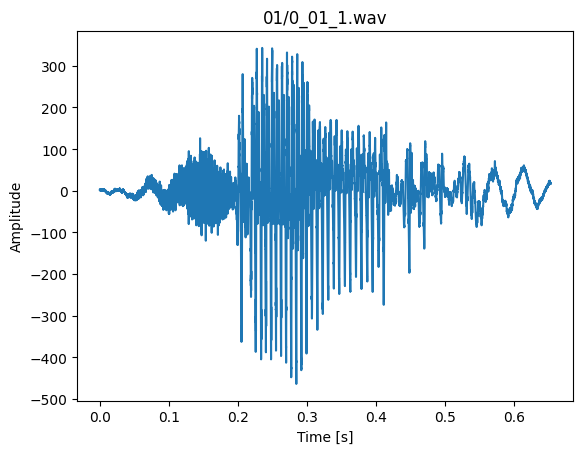

In [16]:
import matplotlib.pyplot as plt
plt.plot(time,data)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(path)
plt.show()

In [17]:
# https://stackoverflow.com/a/37126121
total_time_in_seconds = len(data)/samplerate # Number of seconds in signal X
total_time_in_seconds

0.65325

In [18]:
import pandas as pd
import numpy as np

In [19]:
import glob
import os
print('\nNamed with wildcard *:')
wav_list = []
for name in glob.iglob('AudioMNIST/data/**/*.wav', recursive = True):
    wav_list.append(os.path.basename(name))


Named with wildcard *:


In [20]:
wav_map = []
for path in wav_list:
    filename = path[0:-4]
    filename_split = filename.split("_")
    wav_map.append({"filename": filename, "path": path, "speaker": filename_split[1], "content": filename_split[0], "version": filename_split[2]})

wav_map

[{'filename': '0_01_0',
  'path': '0_01_0.wav',
  'speaker': '01',
  'content': '0',
  'version': '0'},
 {'filename': '0_01_1',
  'path': '0_01_1.wav',
  'speaker': '01',
  'content': '0',
  'version': '1'},
 {'filename': '0_01_10',
  'path': '0_01_10.wav',
  'speaker': '01',
  'content': '0',
  'version': '10'},
 {'filename': '0_01_11',
  'path': '0_01_11.wav',
  'speaker': '01',
  'content': '0',
  'version': '11'},
 {'filename': '0_01_12',
  'path': '0_01_12.wav',
  'speaker': '01',
  'content': '0',
  'version': '12'},
 {'filename': '0_01_13',
  'path': '0_01_13.wav',
  'speaker': '01',
  'content': '0',
  'version': '13'},
 {'filename': '0_01_14',
  'path': '0_01_14.wav',
  'speaker': '01',
  'content': '0',
  'version': '14'},
 {'filename': '0_01_15',
  'path': '0_01_15.wav',
  'speaker': '01',
  'content': '0',
  'version': '15'},
 {'filename': '0_01_16',
  'path': '0_01_16.wav',
  'speaker': '01',
  'content': '0',
  'version': '16'},
 {'filename': '0_01_17',
  'path': '0_01_17

In [21]:
import pandas as pd
pd_wav_map = pd.DataFrame(wav_map)
pd_wav_map = pd_wav_map.sort_values(by='content', ascending=False)
pd_wav_map = pd_wav_map.reset_index()
pd_wav_map

,index,filename,path,speaker,content,version
0,29999,9_60_9,9_60_9.wav,60,9,9
1,5498,9_11_8,9_11_8.wav,11,9,8
2,16955,9_34_13,9_34_13.wav,34,9,13
3,16954,9_34_12,9_34_12.wav,34,9,12
4,16953,9_34_11,9_34_11.wav,34,9,11
...,...,...,...,...,...,...
29995,18031,0_37_37,0_37_37.wav,37,0,37
29996,18030,0_37_36,0_37_36.wav,37,0,36
29997,18029,0_37_35,0_37_35.wav,37,0,35
29998,18028,0_37_34,0_37_34.wav,37,0,34


In [22]:
!pip install dask distributed



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from dask.distributed import Client, progress
client = Client(threads_per_worker=4, n_workers=4)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 16,Total memory: 31.73 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50597,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 16
Started: Just now,Total memory: 31.73 GiB
Comm: tcp://127.0.0.1:50616,Total threads: 4
Dashboard: http://127.0.0.1:50617/status,Memory: 7.93 GiB
Nanny: tcp://127.0.0.1:50600,


In [24]:
client.cluster.scale(10)

In [25]:
import dask.dataframe as dd


In [26]:
ddf = dd.from_pandas(pd_wav_map, npartitions=50)
ddf

,index,filename,path,speaker,content,version
npartitions=50,,,,,,
0,int64,object,object,object,object,object
600,...,...,...,...,...,...
...,...,...,...,...,...,...
29400,...,...,...,...,...,...
29999,...,...,...,...,...,...


In [27]:
ddf.columns[1:-1]
ddf.name="ddf-name-test"

In [28]:
meta_df = pd.DataFrame(columns=ddf.columns, dtype='object')
meta_df.name = "test"
meta_df.name 

'test'

In [29]:
import numba
fast_func = numba.jit(costly_simulation)

In [30]:
res = ddf.apply(costly_simulation, axis=1, meta=meta_df)

In [31]:
res.name = "res-name"

In [32]:
# if __name__ == '__main__':
#   res.compute(scheduler='processes', num_workers=4)

In [33]:
pd_wav_map.iloc[0]

index            29999
filename        9_60_9
path        9_60_9.wav
speaker             60
content              9
version              9
Name: 0, dtype: object

In [39]:
test_run = pd_wav_map.iloc[0]
test_run

index            29999
filename        9_60_9
path        9_60_9.wav
speaker             60
content              9
version              9
Name: 0, dtype: object

2Attempting: 29999: 9_60_9.wav


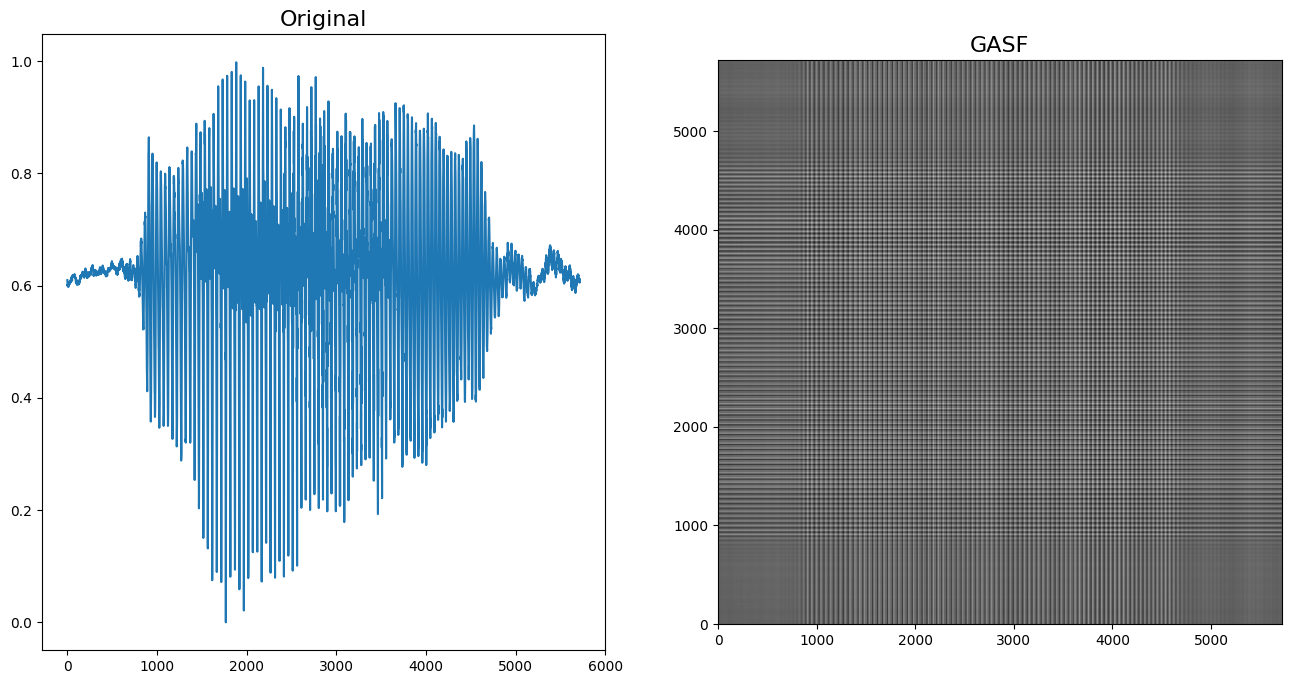

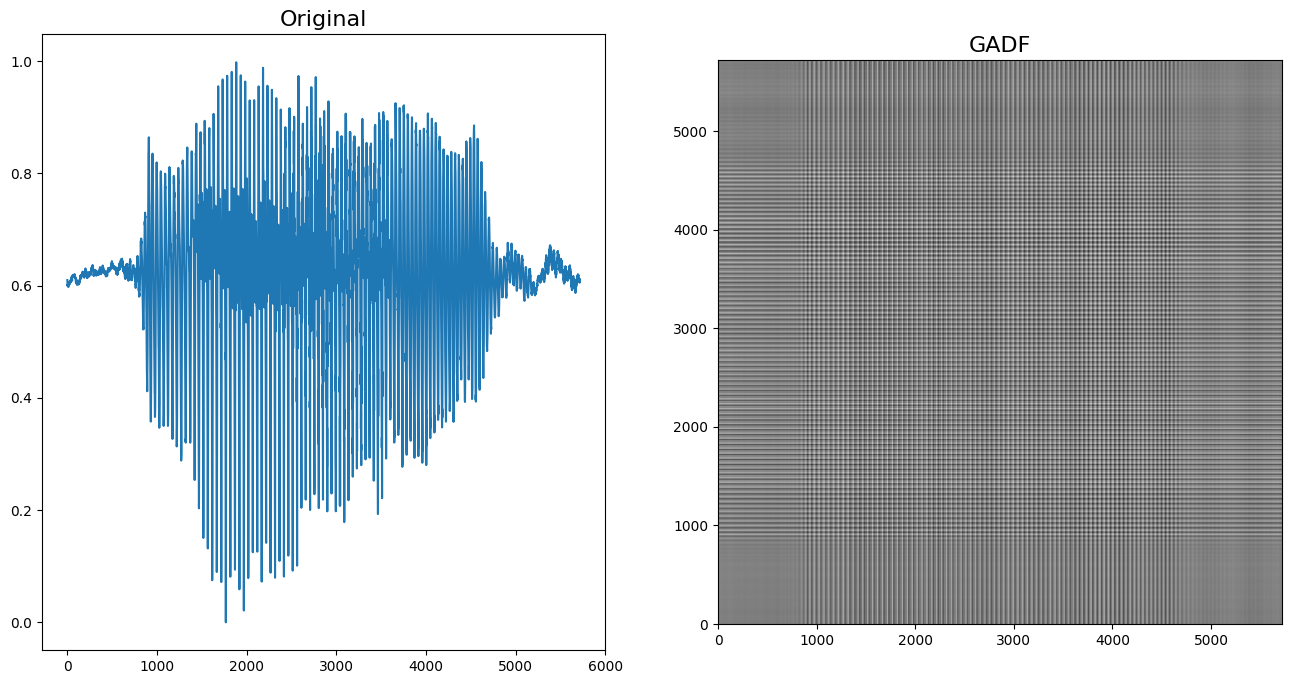

In [40]:
costly_simulation(test_run)

In [41]:
test_filename = test_run['filename']
test_gasf_image = f'out/niceRootFolder/gasf/{test_filename}_gasf.jpg'
test_gadf_image = f'out/niceRootFolder/gadf/{test_filename}_gadf.jpg'

test_gasf_image

'out/niceRootFolder/gasf/9_60_9_gasf.jpg'

In [42]:
import cv2
def readImage(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gry = img_gry.astype("float32")/255
    plt.imshow(img_gry, cmap='gray')
    return img_gry

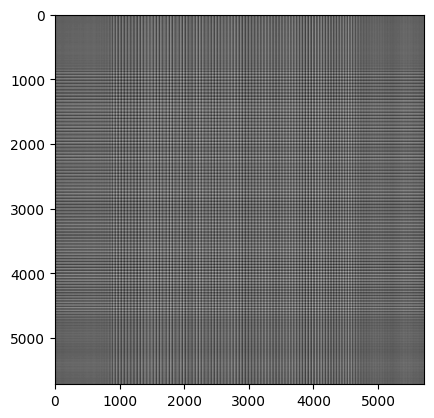

In [43]:
read_image = readImage(test_gasf_image)

In [44]:
# show inline cv2 images without using colab - https://stackoverflow.com/a/53409008
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image

def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

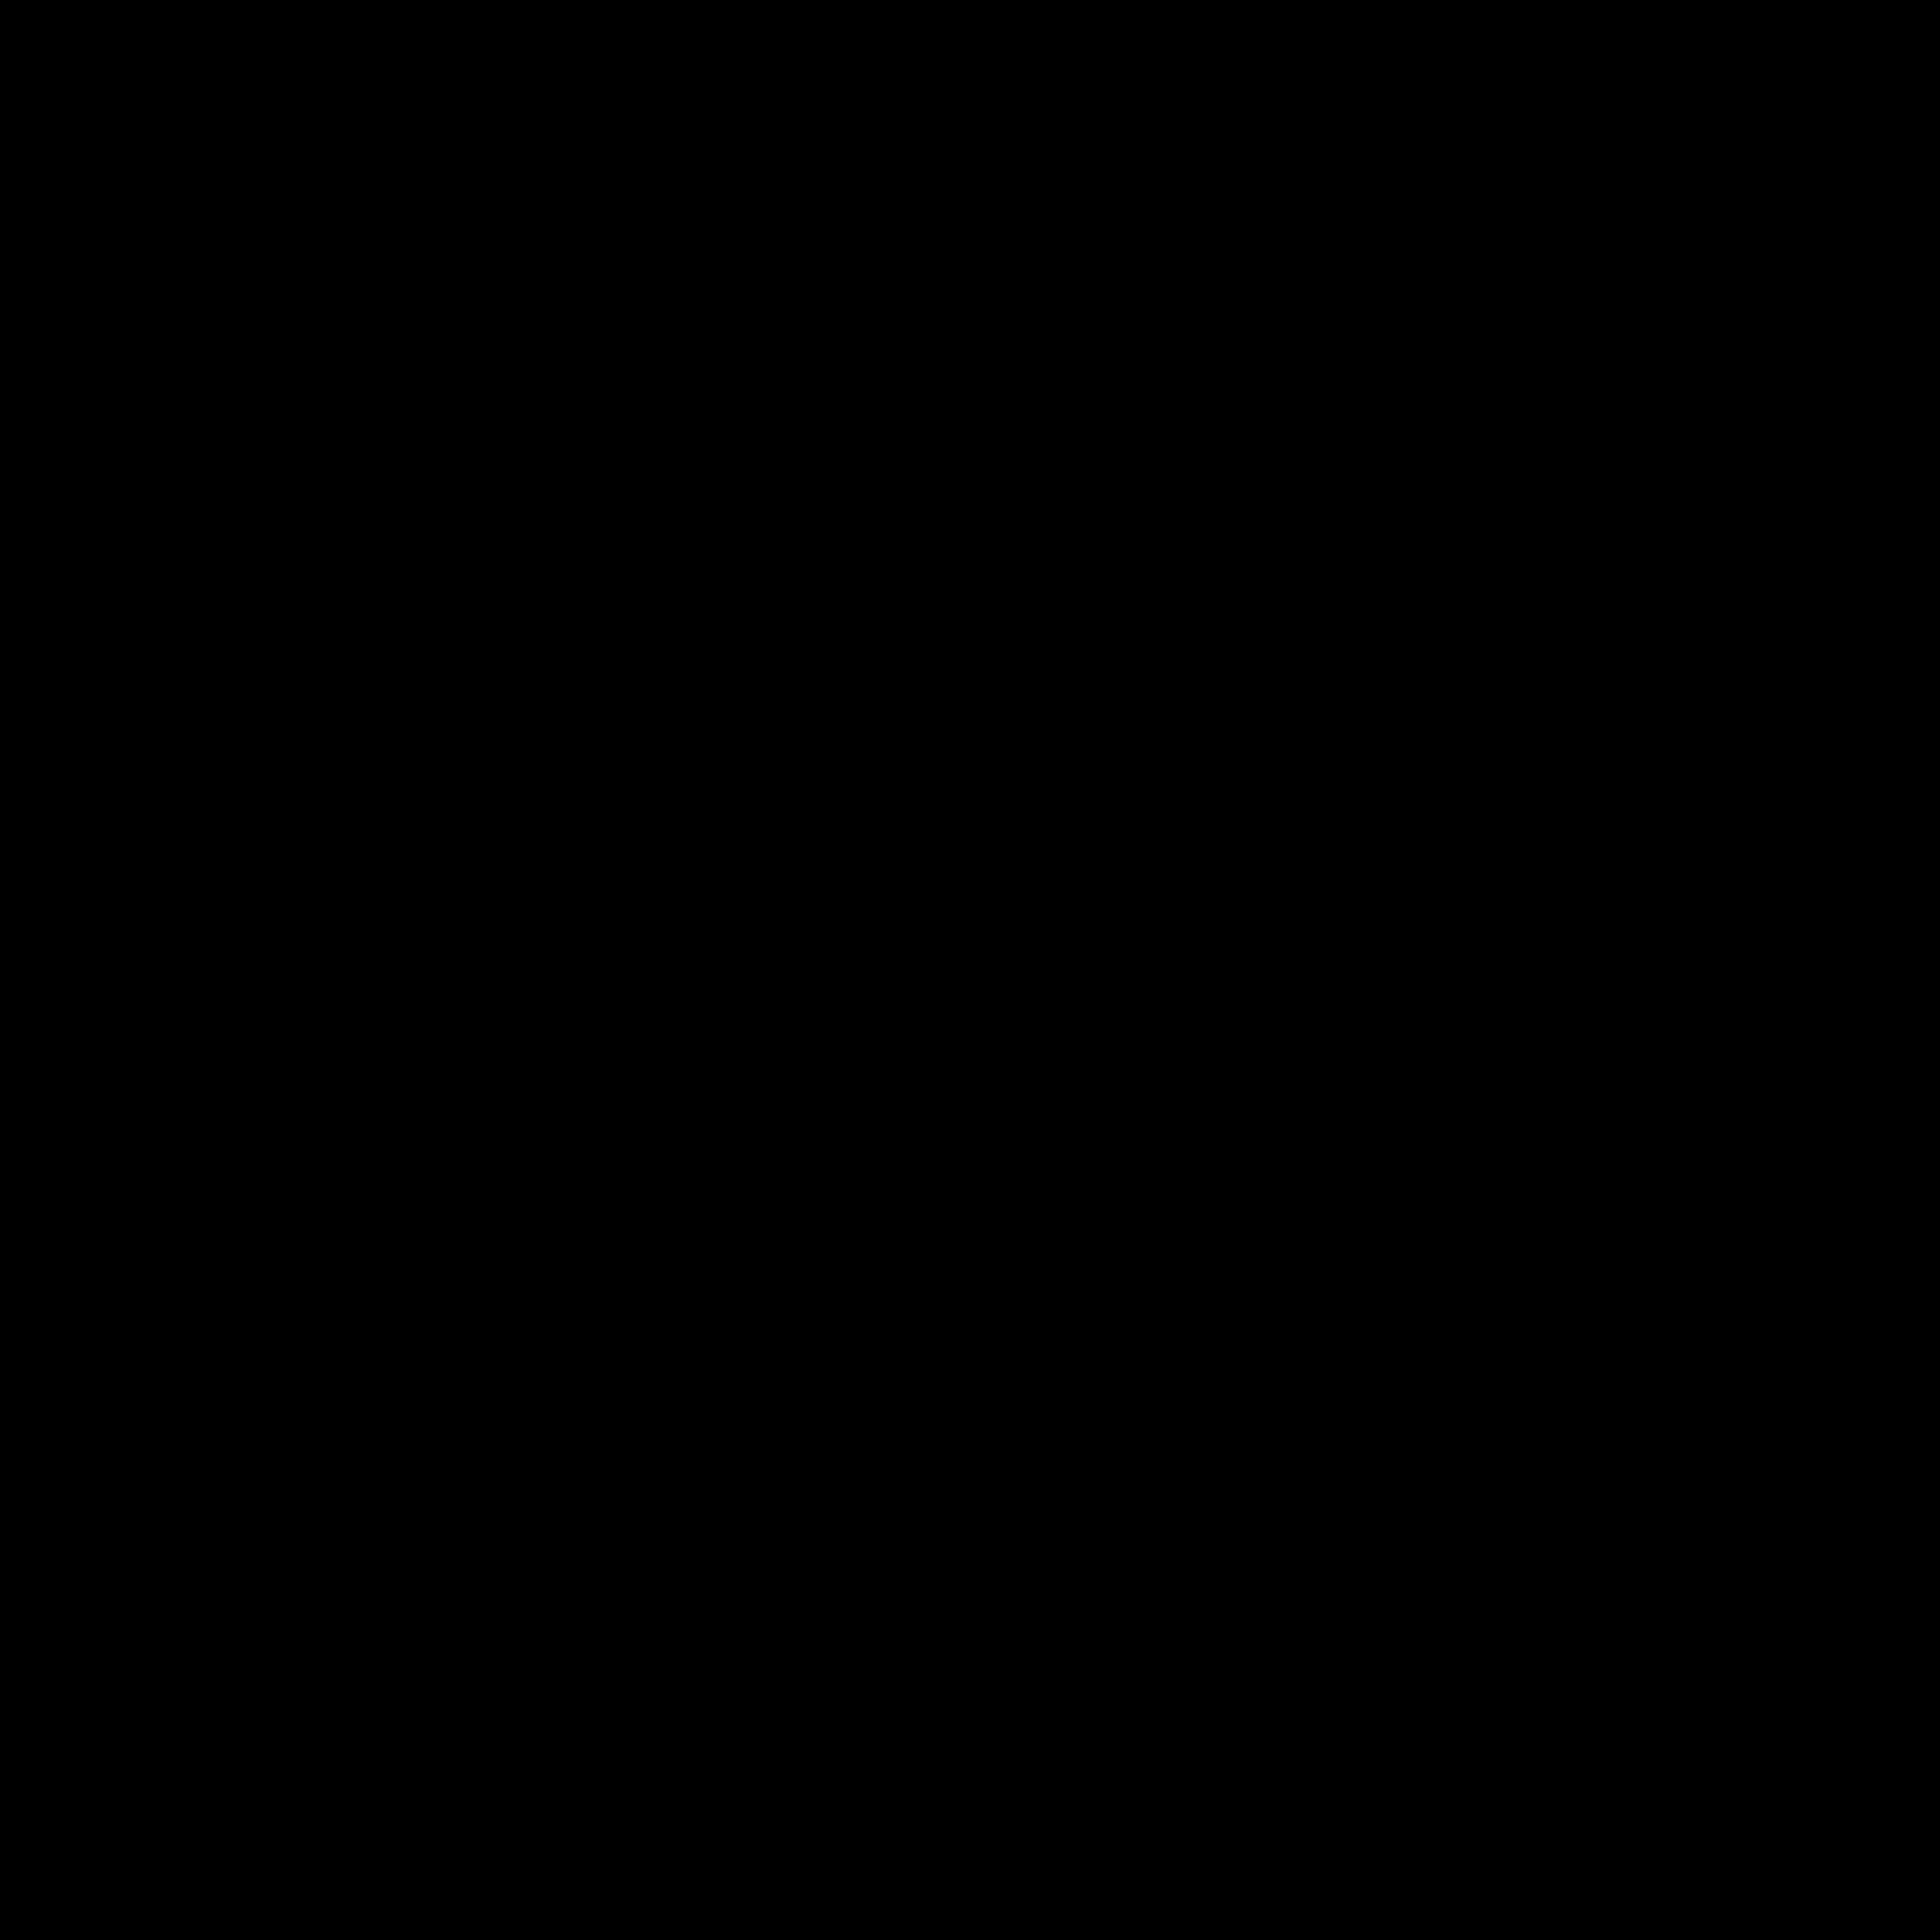

In [45]:
showarray(read_image)

In [46]:
read_image

array([[0.36862746, 0.3647059 , 0.3647059 , ..., 0.36862746, 0.36862746,
        0.36862746],
       [0.36862746, 0.3647059 , 0.3647059 , ..., 0.36862746, 0.36862746,
        0.36862746],
       [0.36862746, 0.3647059 , 0.3647059 , ..., 0.36862746, 0.36862746,
        0.36862746],
       ...,
       [0.36862746, 0.36862746, 0.36862746, ..., 0.37254903, 0.37254903,
        0.37254903],
       [0.36862746, 0.36862746, 0.36862746, ..., 0.37254903, 0.37254903,
        0.37254903],
       [0.36862746, 0.36862746, 0.36862746, ..., 0.37254903, 0.37254903,
        0.37254903]], dtype=float32)

In [47]:
# b,g,r    = cv2.split(read_image)
# r

In [48]:
# read_image[:, :, 1:].shape
# read_image[:, :, 1:]

In [49]:
# read_image[:,1:,1:].shape

In [50]:
diag_series = pd.Series(np.diag(read_image))
diag_series

0       0.368627
1       0.364706
2       0.364706
3       0.360784
4       0.360784
          ...   
5712    0.372549
5713    0.372549
5714    0.372549
5715    0.372549
5716    0.372549
Length: 5717, dtype: float32

In [51]:
df_diag_series = pd.DataFrame(diag_series)
df_diag_series

,0
0,0.368627
1,0.364706
2,0.364706
3,0.360784
4,0.360784
...,...
5712,0.372549
5713,0.372549
5714,0.372549
5715,0.372549


In [52]:
import math
def reconstruct_gaf(number):
    # return (((math.cos(2 * number) + 1) / 2)**(1/2))
    return  np.arccos(((math.cos(2 * number) + 1) / 2)**(1/2))

In [53]:
df_diag_series['reconstructed'] = (df_diag_series[0].apply(lambda x: reconstruct_gaf(x)))
df_diag_series

,0,reconstructed
0,0.368627,0.368627
1,0.364706,0.364706
2,0.364706,0.364706
3,0.360784,0.360784
4,0.360784,0.360784
...,...,...
5712,0.372549,0.372549
5713,0.372549,0.372549
5714,0.372549,0.372549
5715,0.372549,0.372549


In [54]:
series = pd.DataFrame(df_diag_series[0], df_diag_series.index)
series

,0
0,0.368627
1,0.364706
2,0.364706
3,0.360784
4,0.360784
...,...
5712,0.372549
5713,0.372549
5714,0.372549
5715,0.372549


In [55]:
# https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns/
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(series.to_numpy())
df_scaled = pd.DataFrame(df_scaled)

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()

Scaled Dataset Using MinMaxScaler


,0
0,0.368627
1,0.364706
2,0.364706
3,0.360784
4,0.360784


In [56]:
#min_ = np.amin(series)
#max_ = np.amax(series)

scaled_serie = series
#scaled_serie = (series - min_)/(max_ - min_)

#scaled_serie = np.where(scaled_serie >= 1, 1, scaled_serie)
#scaled_serie = np.where(scaled_serie <= 0, 0, scaled_serie)
df_unscaled = pd.DataFrame(scaled_serie)


In [57]:
df_unscaled

,0
0,0.368627
1,0.364706
2,0.364706
3,0.360784
4,0.360784
...,...
5712,0.372549
5713,0.372549
5714,0.372549
5715,0.372549


In [58]:
df_scaled['rec'] = df_unscaled[0].apply(lambda x: reconstruct_gaf(x))
# df_scaled['rec'] = df_scaled[0] * math.pi/2
# df_scaled['rec'] = df_scaled[0]

In [59]:
# [df_scaled.index.values, df_scaled['rec']]

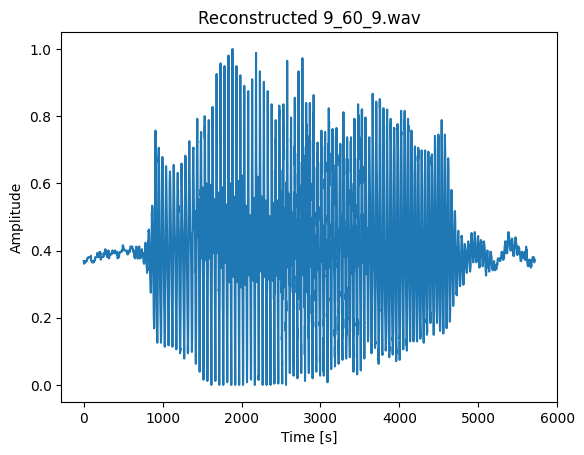

In [60]:
import matplotlib.pyplot as plt
plt.plot(df_diag_series.index.values,df_scaled['rec'])
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Reconstructed ' + path)
plt.show()